In [349]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame

np.random.seed(42)

%matplotlib inline

In [350]:
df=pd.read_csv("diamonds.csv")


In [331]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<AxesSubplot:>

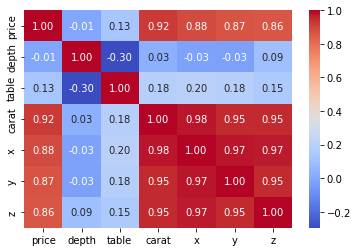

In [332]:
sns.heatmap(df[['price','depth','table','carat','x','y','z']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')


In [333]:
df["table"]=(df["table"]-df["table"].abs().min())/(df["table"].abs().max()-df["table"].abs().min())
df["depth"]=(df["depth"]-df["depth"].abs().min())/(df["depth"].abs().max()-df["depth"].abs().min())

In [334]:
dummies=pd.get_dummies(df.loc[:,["cut","color","clarity"]])
df[dummies.columns] = dummies
df.drop(df.iloc[:,[0,2,3,4]],inplace=True, axis=1)
df

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,0.513889,0.230769,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,0.466667,0.346154,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,0.386111,0.423077,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,0.538889,0.288462,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,0.563889,0.288462,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0.494444,0.269231,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,0.558333,0.230769,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,0.550000,0.326923,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,0.500000,0.288462,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [335]:
train=df.sample(frac=0.8)
test=df.drop(train.index)
test.shape,train.shape

((10788, 27), (43152, 27))

In [336]:
trainy=train["price"].to_numpy()
trainx=train.drop(["price"],axis=1)
testy=test["price"].to_numpy()

testx=test.drop(["price"],axis=1).to_numpy()

trainx=trainx.to_numpy()
testx.shape,testy.shape,trainx.shape[0]

train.shape,trainx.shape

((43152, 27), (43152, 26))

In [337]:
def mean_squared_error(y_pred,test):
    m,_=y_pred.shape
    error=test-y_pred
    sqrt_error=np.dot(error.T,error).item()
    return sqrt_error/(2*m)



In [338]:
class Linear_regression:
    def __init__(self,x,y,alpha=0.01):
        self.x=x
        self.y=y
        self.alpha=alpha
        self.samples,self.features=x.shape
        self.theta=np.ones(shape=(self.features, 1))
        self.losses=[]
        #self.theta=np.reshape(self.theta,(self.theta.size,1))
        
    def predict(self,x):
        return np.dot(x, self.theta)
    
    def cost(self,theta):
        temp=self.y-np.dot(self.x,theta)
        loss=np.dot(temp.T,temp).item()
        loss=loss/(2*(self.samples))
        self.losses.append(loss)
        
    def training(self,n=1000):
        while(n):
            
            self.y_hat=np.dot(self.x,self.theta)
            temp=self.y-self.y_hat
            
            self.gradient=np.dot(self.x.T,temp)
            #print(self.gradient.shape)            
            self.theta=self.theta+((self.alpha/self.samples)*self.gradient)
            self.cost(self.theta)
            #print(self.theta.shape)
            n=n-1
    
        return self.theta
    
    def testing(self,x,theta):
        self.test_x=x
        self.test_y=np.dot(x,self.theta)
        print(self.test_y)
        return self.test_y
        

In [339]:
trainy=np.reshape(trainy,(trainy.size,1))
testy=np.reshape(testy,(testy.size,1))


In [340]:
bias_col = np.ones(shape=(trainx.shape[0], 1))
trainx = np.hstack((bias_col, trainx))
bias_col = np.ones(shape=(testx.shape[0], 1))

testx=np.hstack((bias_col, testx))
bias_col.shape,trainx.shape

((10788, 1), (43152, 27))

In [341]:
#trainx=trainx.transpose()
trainx.shape,trainy.shape

((43152, 27), (43152, 1))

In [342]:
train.shape,trainx.shape,trainx

((43152, 27),
 (43152, 27),
 array([[1.        , 0.24      , 0.53055556, ..., 0.        , 1.        ,
         0.        ],
        [1.        , 0.58      , 0.47222222, ..., 0.        , 0.        ,
         1.        ],
        [1.        , 0.4       , 0.53055556, ..., 0.        , 0.        ,
         1.        ],
        ...,
        [1.        , 0.41      , 0.575     , ..., 0.        , 1.        ,
         0.        ],
        [1.        , 1.09      , 0.48888889, ..., 0.        , 0.        ,
         1.        ],
        [1.        , 0.3       , 0.54722222, ..., 0.        , 0.        ,
         0.        ]]))

In [343]:
model=Linear_regression(trainx,trainy)


In [344]:
mp=model.training(n=1000)

In [345]:
np.dot(model.x, mp), trainy

(array([[ 232.755763  ],
        [3204.10010859],
        [1555.78968008],
        ...,
        [1637.90366455],
        [6573.69994648],
        [ 606.07879606]]),
 array([[ 559],
        [2201],
        [1238],
        ...,
        [1169],
        [8364],
        [ 526]]))

In [346]:
pred=model.testing(testx,mp)


[[ 160.20838119]
 [ 149.01509372]
 [ 166.44078432]
 ...
 [3910.77201057]
 [3389.8737843 ]
 [3193.36256829]]


In [347]:
mean_squared_error(testy,pred)


1276322.5587962246

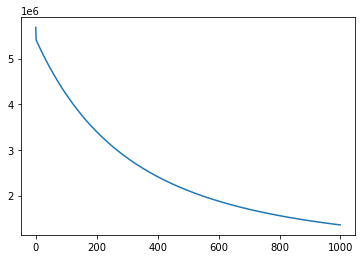

In [348]:
plt.plot(model.losses)